##### Student Name: Dinh Nghi Dung Le
##### Student ID: 46150641

# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In [3]:
# Read the socioeconomic areas data
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [4]:
# Create an LGA column by removing the letters in brackets and converting to uppercase
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-4-9adc5f4db997>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

### Question 4

In [5]:
#Question 4
# Group 4 measurements with LGA
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head() #Social economic level

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [6]:
# Create population column
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [7]:
#Join dataframe of the 4 measurements (IEO, IER, IRSAD, IRSD) and population to dataframe sa_vouchers by same LGA
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


### Summary for question 4
Because the 4 measurements are able to join the dataframe contain the number of vouchers use, it is possible to conclude there is a relationship between the 4 measurements and the voucher use by LGA.

In [8]:
sa_vouchers_scores_group = sa_vouchers_scores.groupby('Participant_LGA')

### Question 1

In [9]:
# Question 1: 
#Voucher distribution by regions/ LGA
sa_LGA=pd.DataFrame({'count':sa_vouchers_scores_group.size()})
LGA_scores['count']=sa_LGA['count']
#Merge voucher by LGA to dataframe
sa_count=sa_vouchers_scores.merge(sa_LGA['count'], left_on='Participant_LGA', right_index=True)
sa_count = sa_count.rename(columns={'count': 'Count_by_LGA'})
sa_count.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population,Count_by_LGA
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0,12782
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0,12782
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0,12782
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0,12782
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0,12782


<AxesSubplot:xlabel='Count_by_LGA', ylabel='Participant_LGA'>

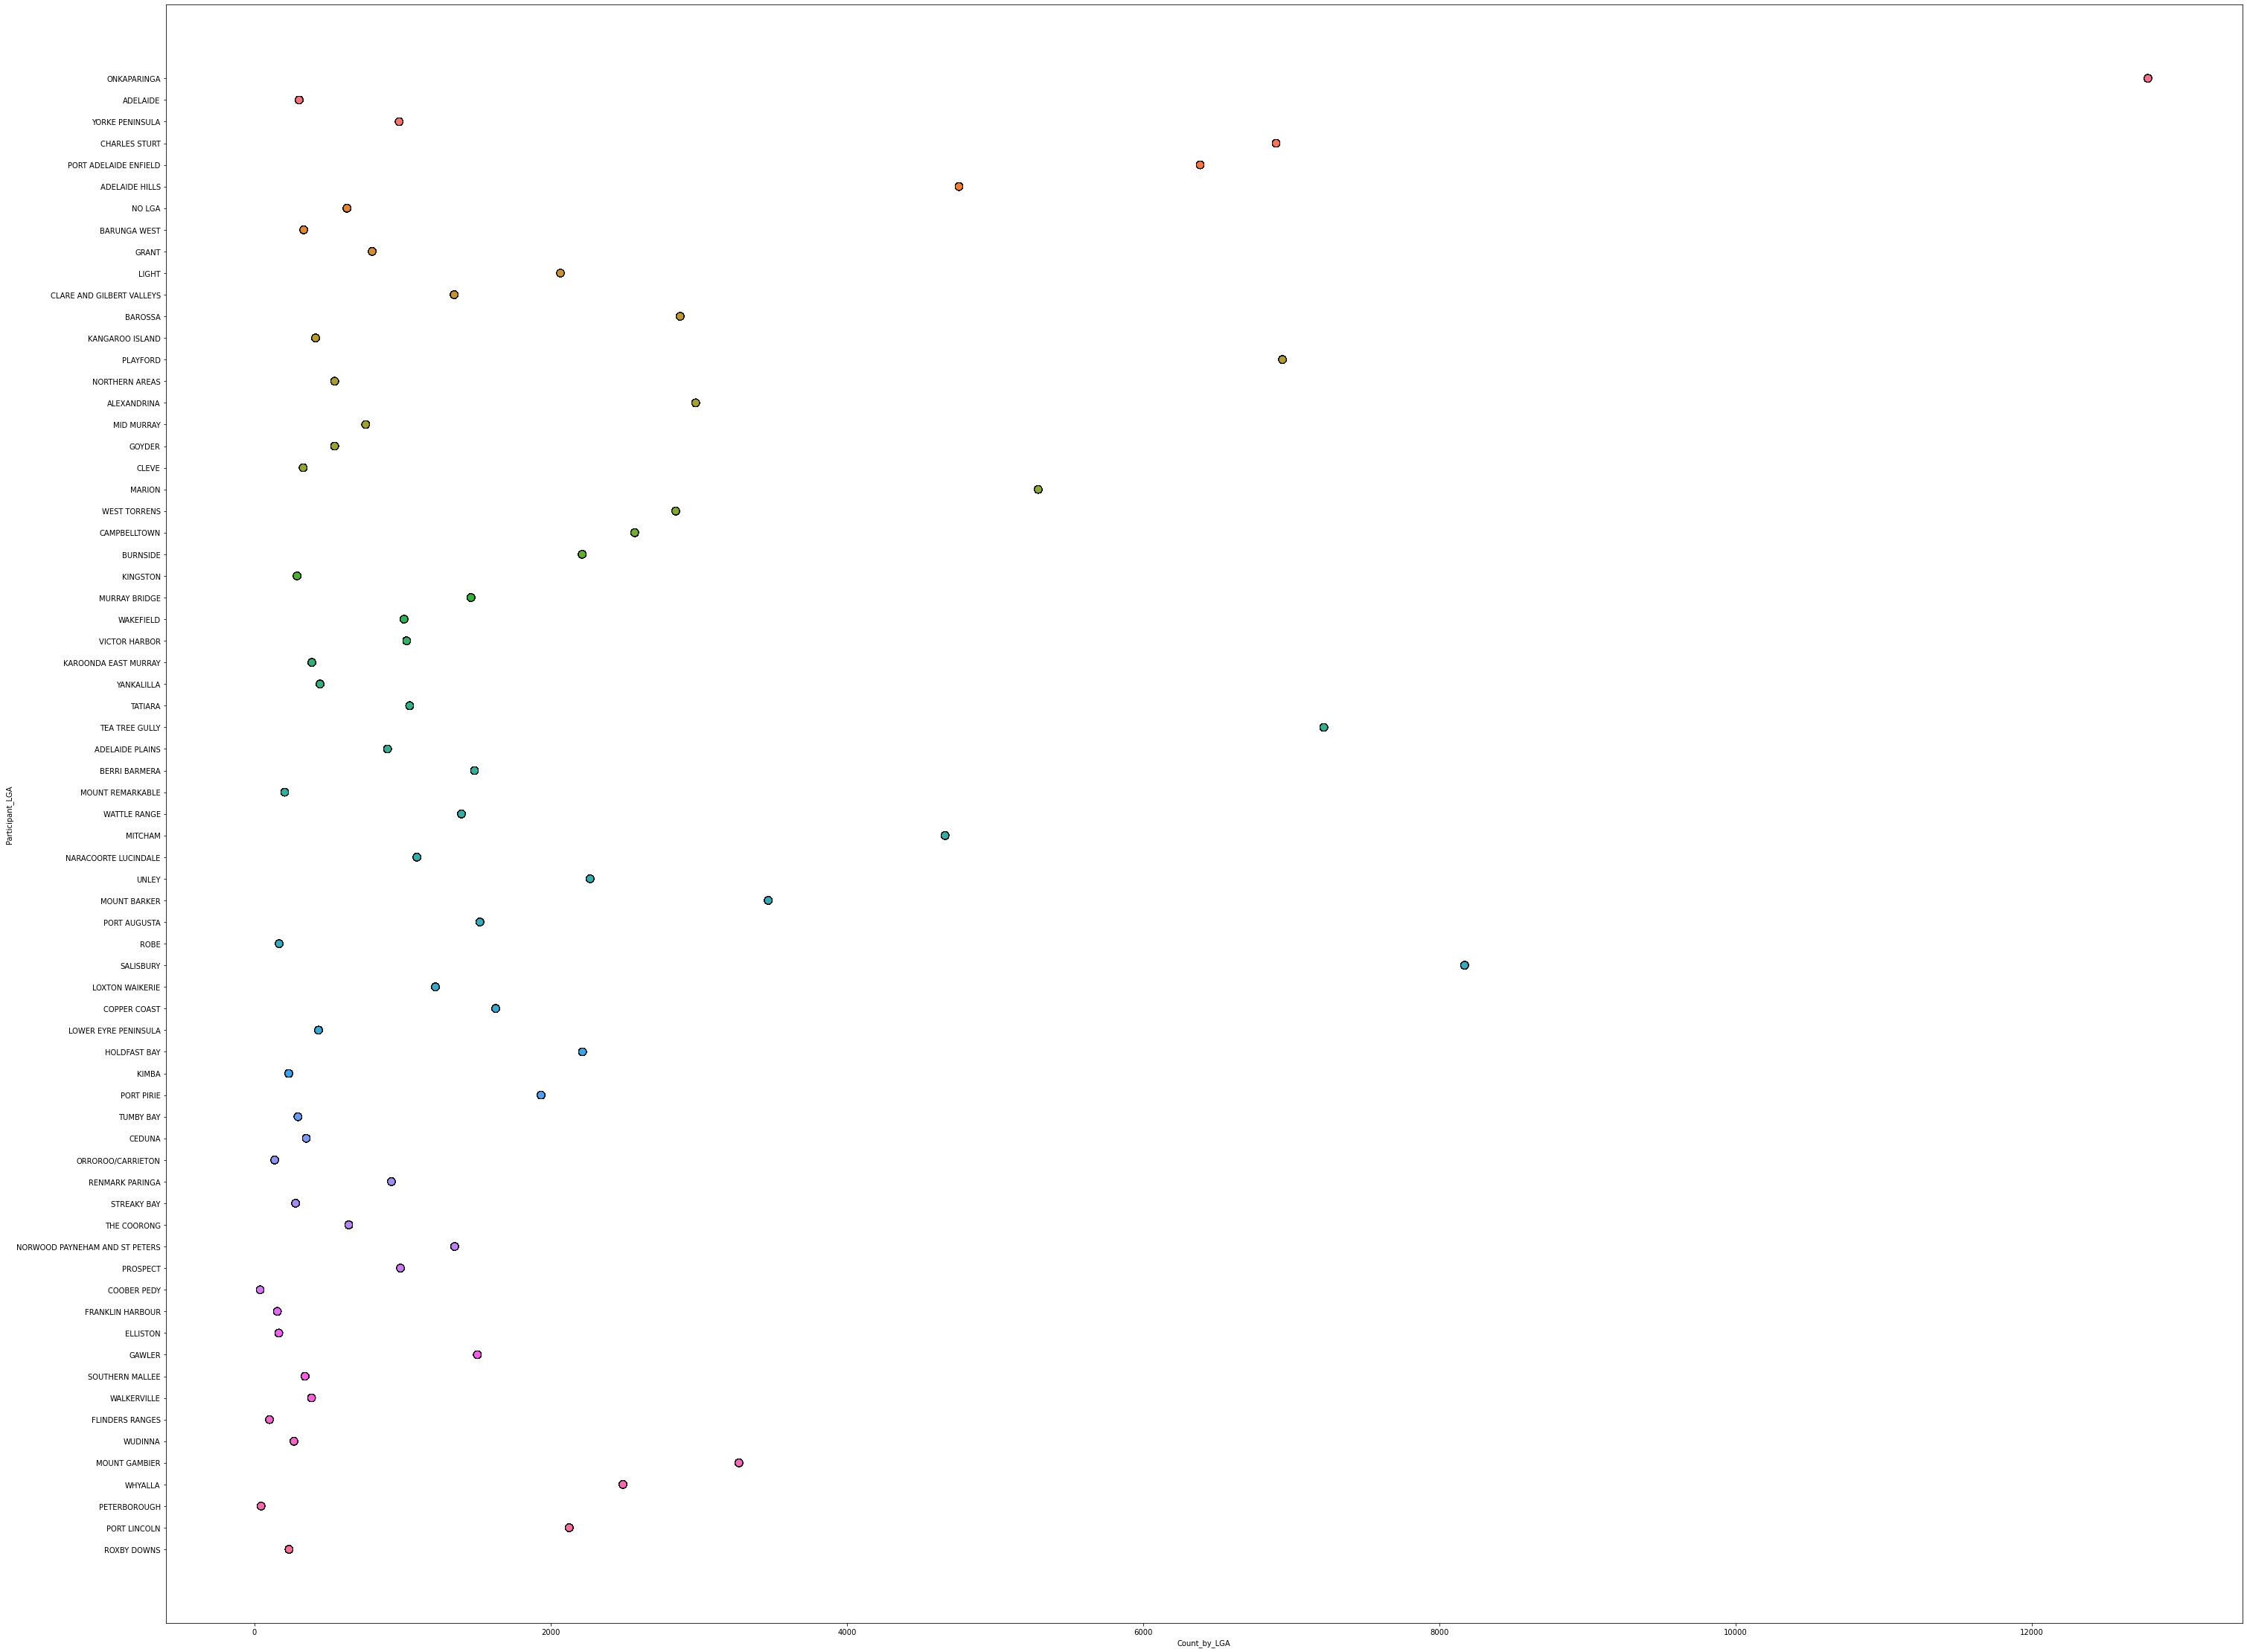

In [10]:
#Scatterplot shows the voucher distribution by regions/ LGA
plt.figure(figsize = (50,40))
sns.scatterplot(data=sa_count, x="Count_by_LGA", y="Participant_LGA", hue="Participant_LGA", s=100, linewidths=.5, edgecolor="black", legend=False)

The scatterplot shows that voucher distribution by LGA is normally distributed.

In [11]:
#Voucher distribution by regions/ LGA
sa_LGA=sa_LGA.join(LGA_scores['Population'], on='Participant_LGA')
sa_LGA['percent_vouchers']=100*sa_LGA['count']/sa_LGA['count'].sum() #Voucher use percentage among different LGA voucher use
sa_LGA['percent_population']=100*sa_LGA['count']/sa_LGA['Population'] #Voucher use percentage compare with total population among LGA
sa_LGA

,count,Population,percent_vouchers,percent_population
Participant_LGA,,,,
ADELAIDE,302,19606.0,0.236814,1.540345
ADELAIDE HILLS,4756,38601.0,3.729436,12.320924
ADELAIDE PLAINS,899,NaN,0.704954,NaN
ALEXANDRINA,2979,23693.0,2.335994,12.573334
BAROSSA,2874,22174.0,2.253658,12.961126
...,...,...,...,...
WEST TORRENS,2844,54932.0,2.230133,5.177310
WHYALLA,2488,22070.0,1.950975,11.273222
WUDINNA,267,1256.0,0.209369,21.257962


In [12]:
sa_LGA['percent_vouchers'].nlargest(5) # Top 5 LGA that have largest vouchers distribution 

Participant_LGA
ONKAPARINGA       10.023054
SALISBURY          6.405753
TEA TREE GULLY     5.660806
PLAYFORD           5.442028
CHARLES STURT      5.408309
Name: percent_vouchers, dtype: float64

In [13]:
sa_LGA['percent_population'].nlargest(5) # Top 5 LGA that have largest vouchers distribution compare to population

Participant_LGA
KAROONDA EAST MURRAY    37.487923
KIMBA                   21.343146
WUDINNA                 21.257962
CLEVE                   19.028340
SOUTHERN MALLEE         16.309013
Name: percent_population, dtype: float64

In [14]:
# Turn index to columns
sa_LGA.reset_index(inplace=True)

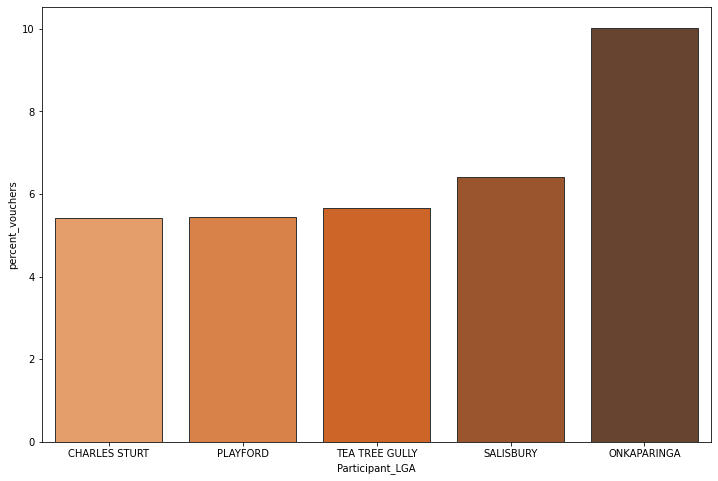

In [15]:
#Barplot for 5 LGA that have largest vouchers distribution
largest_pv=sa_LGA[sa_LGA["Participant_LGA"].isin(['ONKAPARINGA','SALISBURY', 'TEA TREE GULLY', 'PLAYFORD','CHARLES STURT'])]
largest_pv=largest_pv.sort_values(by='percent_vouchers')
plt.figure(figsize = (12,8))
ax = sns.barplot(y='percent_vouchers', x='Participant_LGA',data=largest_pv, palette="Oranges_d", linewidth=1, edgecolor=".2")

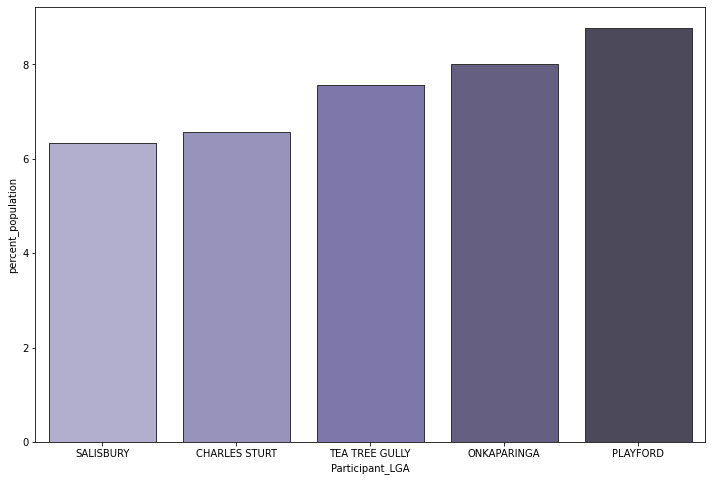

In [16]:
#Barplot for 5 LGA that have largest vouchers distribution
largest_pp=sa_LGA[sa_LGA["Participant_LGA"].isin(['KAROONDA EAST MURRAY','KIMBA', 'WUDINNA', 'CLEVE', 'SOUTHERN MALLEE'])]
largest_pp=largest_pv.sort_values(by='percent_population')
plt.figure(figsize = (12,8))
ax = sns.barplot(y='percent_population', x='Participant_LGA',data=largest_pp, palette="Purples_d", linewidth=1, edgecolor=".2")

In [17]:
#Voucher distribution by sports
sa_vouchers_scores_sport = sa_vouchers_scores.groupby('Voucher_Sport')
sa_vouchers_scores_sport.size()
sa_sport=pd.DataFrame({'count':sa_vouchers_scores_sport.size()}) # The number of voucher use by sports
sa_sport['percent_vouchers']=100*sa_sport['count']/sa_sport['count'].sum() # Percentage of voucher use by sports
sa_sport.head()

,count,percent_vouchers
Voucher_Sport,,
Archery,34,0.026661
Athletics,4518,3.542807
Australian Rules,47224,37.030880
BMX,157,0.123112
Badminton,4,0.003137


In [18]:
sa_sport['percent_vouchers'].nlargest(5) # Top 5 sports that have largest vouchers distribution 

Voucher_Sport
Australian Rules     37.030880
Netball              18.833022
Football (Soccer)    12.370027
Gymnastics            7.702743
Basketball            4.717469
Name: percent_vouchers, dtype: float64

In [19]:
# Turn index to columns
sa_sport.reset_index(inplace=True)

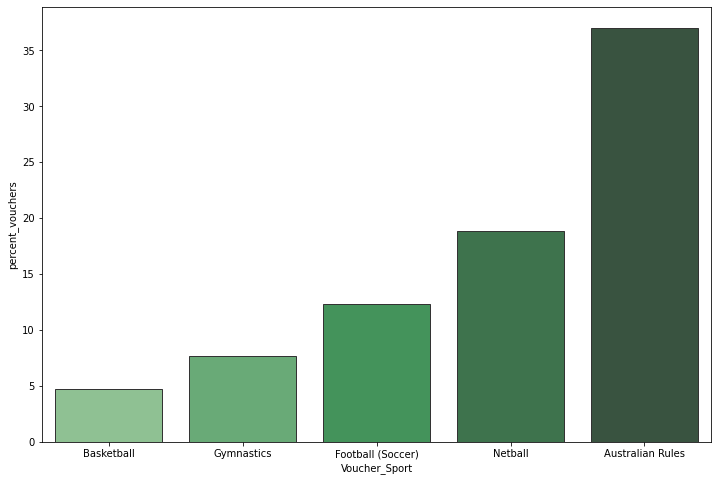

In [20]:
#Barplot for 5 sports that have largest vouchers distribution
largest_sv=sa_sport[sa_sport["Voucher_Sport"].isin(['Australian Rules','Netball', 'Football (Soccer)', 'Gymnastics', 'Basketball'])]
largest_sv=largest_sv.sort_values(by='percent_vouchers')
plt.figure(figsize = (12,8))
ax = sns.barplot(y='percent_vouchers', x='Voucher_Sport',data=largest_sv, palette="Greens_d", linewidth=1, edgecolor=".2")

### Summary
* LGA that have largest vouchers distribution is **ONKAPARINGA** which take up 10% of total voucher use of all LGA. LGA that have largest vouchers distribution compare to population is **KAROONDA EAST MURRAY** which take up 37.5% of its total population. 
* The sport that have largest vouchers distribution is **Australian Rules** which take up 37.03% of total voucher use by sports and vouchers distribution for Australian Rules is much larger than other high rank sports. 

### Question 2 

In [21]:
# Question 2 
# Voucher distribution by sport and lga
sa_vouchers_scores_VS_LGA = sa_vouchers_scores.groupby(['Participant_LGA','Voucher_Sport']) #Group data by sport and LGA
sa_vs_lga=pd.DataFrame({'Count_by_Sport':sa_vouchers_scores_VS_LGA.size()}) #Voucher use of each sport on each LGA
sa_vs_lga=sa_vs_lga.join(LGA_scores['count'], on='Participant_LGA') #Voucher use of all sports on each LGA
sa_vs_lga=sa_vs_lga.rename(columns={'count': 'Count_by_LGA'})
sa_vs_lga['percent_vouchers_by_regions']=100*sa_vs_lga['Count_by_Sport']/sa_vs_lga['Count_by_LGA'] #Percent of each sport voucher use on each LGA
sa_vs_lga=sa_vs_lga.dropna() #Drop missing values
sa_vs_lga.head()

Count_by_Sport  Count_by_LGA  \
Participant_LGA Voucher_Sport                                    
ADELAIDE        Athletics                     16         302.0   
                Australian Rules             130         302.0   
                Baseball                       1         302.0   
                Basketball                     4         302.0   
                Calisthenics                   1         302.0   

                                  percent_vouchers_by_regions  
Participant_LGA Voucher_Sport                                  
ADELAIDE        Athletics                            5.298013  
                Australian Rules                    43.046358  
                Baseball                             0.331126  
                Basketball                           1.324503  
                Calisthenics                         0.331126

In [22]:
# Turn index to columns
sa_vs_lga.reset_index(inplace=True)
sa_vs_lga.head()

,Participant_LGA,Voucher_Sport,Count_by_Sport,Count_by_LGA,percent_vouchers_by_regions
0,ADELAIDE,Athletics,16,302.0,5.298013
1,ADELAIDE,Australian Rules,130,302.0,43.046358
2,ADELAIDE,Baseball,1,302.0,0.331126
3,ADELAIDE,Basketball,4,302.0,1.324503
4,ADELAIDE,Calisthenics,1,302.0,0.331126


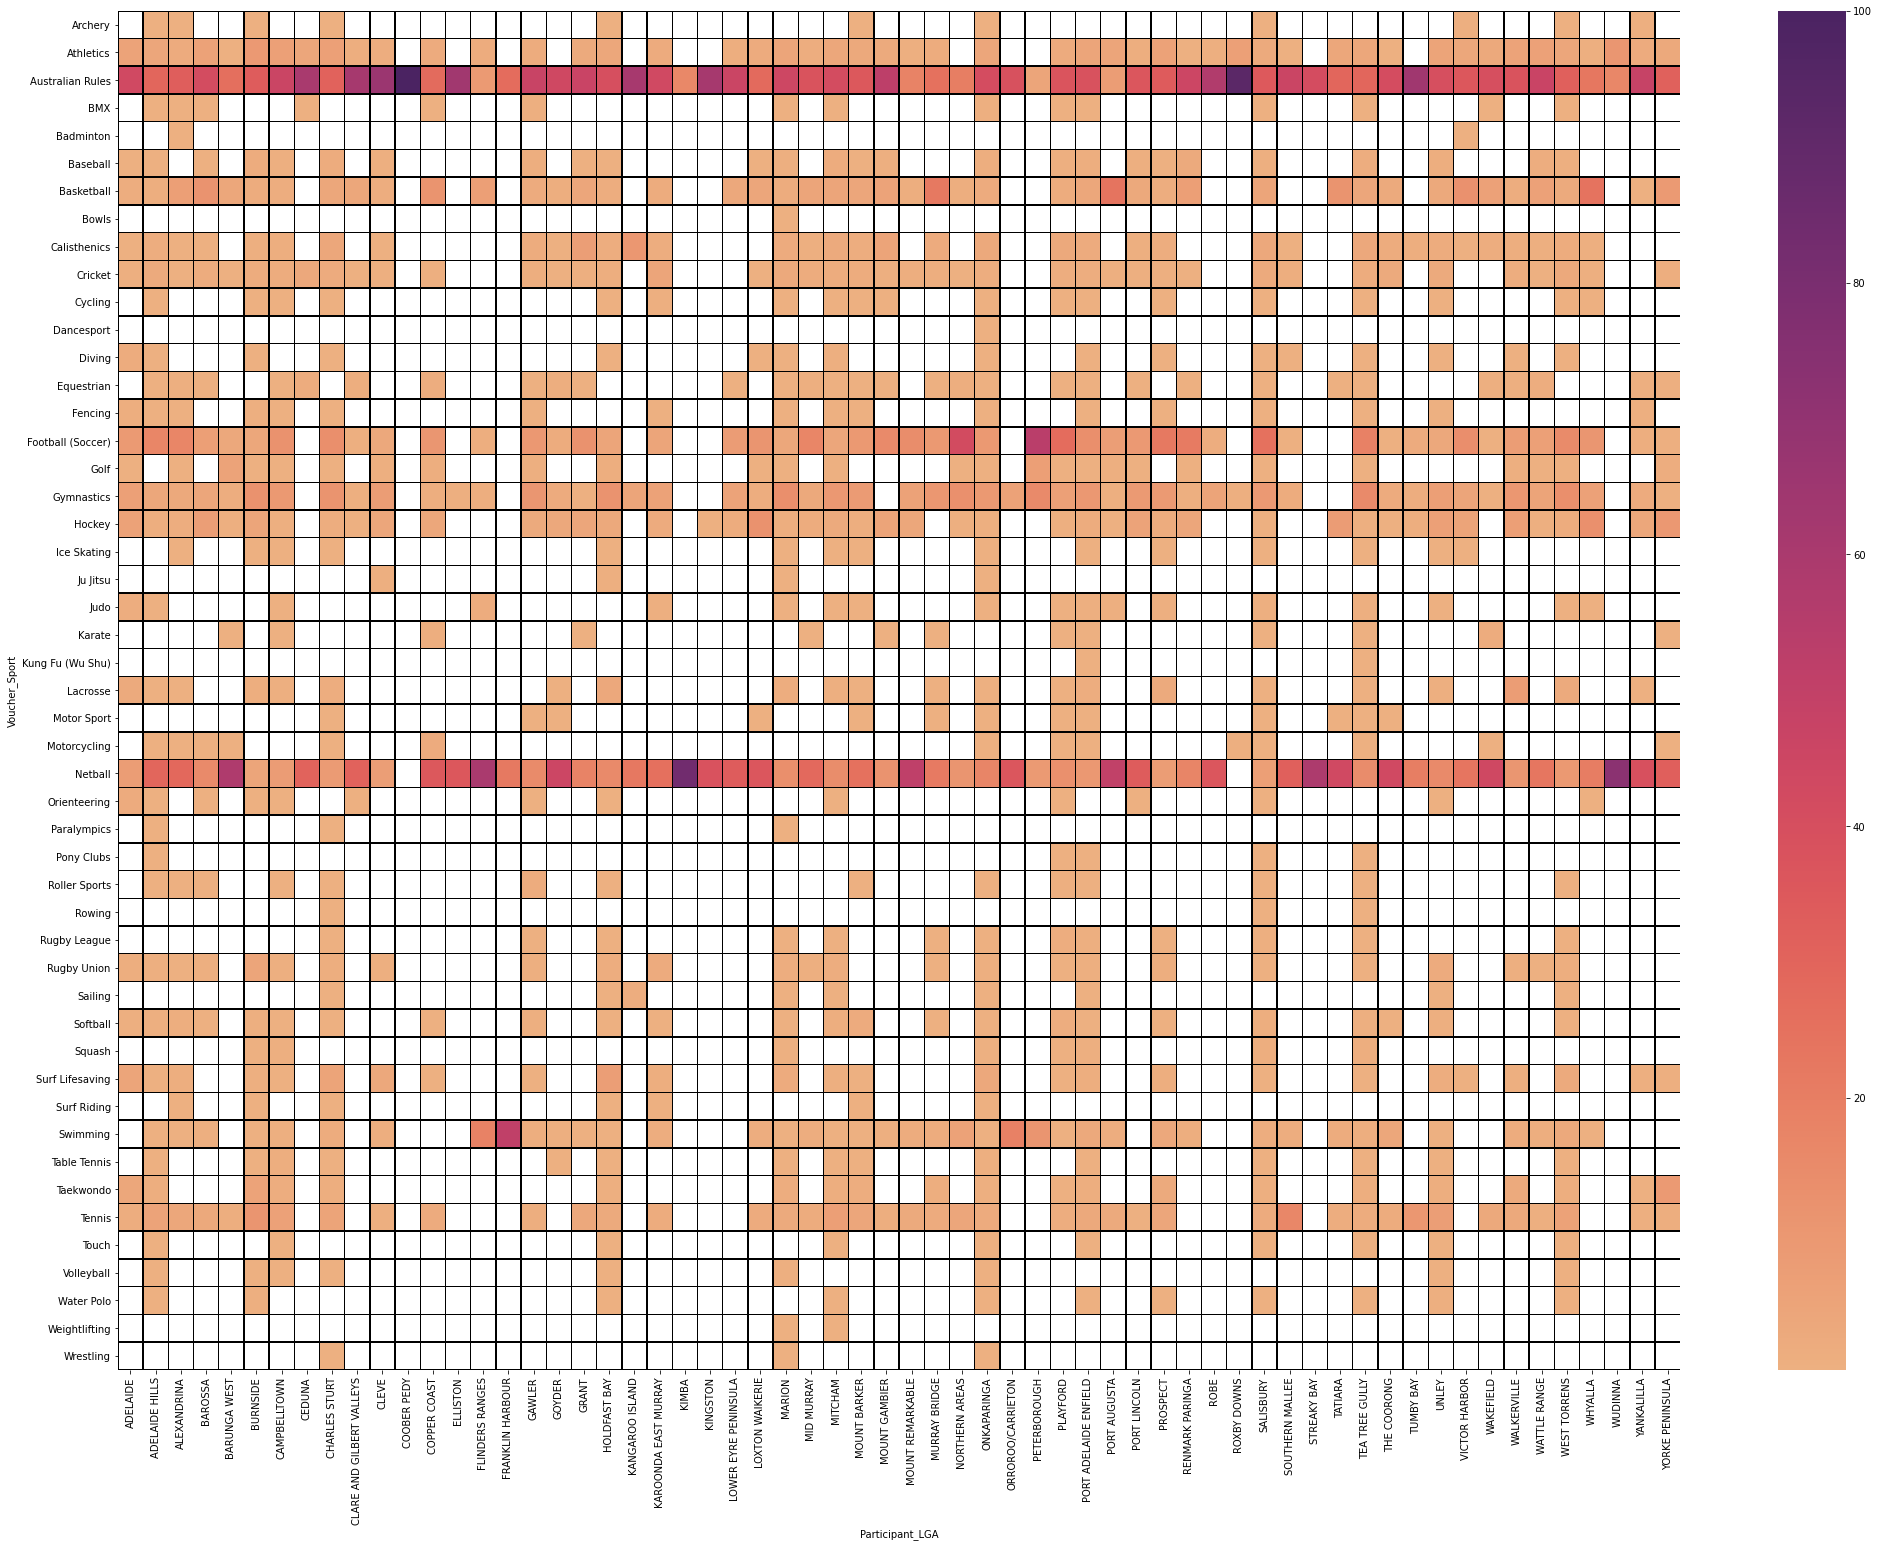

In [23]:
#Heatmap for voucher distribution of sports in different parts of the state
vs_lga = sa_vs_lga.pivot("Voucher_Sport", "Participant_LGA", "percent_vouchers_by_regions")
plt.figure(figsize = (35,25))
ax = sns.heatmap(vs_lga, linewidths=.5, linecolor='black', cmap=sns.color_palette("flare", as_cmap=True))

### Summary
* The voucher distribution by sports in different LGA varies significantly. 
* For Autralian Rules, it is more popular in COOBER PEDY and ROXBY DOWINS, and less popular in PETERBOROUGH and PORT AUGUSTA. 
* For Netball, it is more popular in KIMBA and WUDINNA, and less popular in WEST TORRENS. 
* For Swimming, it is more popular in FRANKLIN HARBOUR and less popular in WHYALLA.

### Question 3 

In [24]:
# Question 3 
# Voucher distribution changes by years
sa_vouchers_scores_year = sa_vouchers_scores.groupby(['Participant_LGA','Voucher_Claim_Year'])
sa_LGA_year=pd.DataFrame({'Count':sa_vouchers_scores_year.size()})
sa_LGA_year=sa_LGA_year.join(LGA_scores['Population'], on='Participant_LGA')
sa_LGA_year=sa_LGA_year.join(LGA_scores['count'], on='Participant_LGA')
sa_LGA_year=sa_LGA_year.rename(columns={'count': 'Count_by_LGA'})
sa_LGA_year['Voucher_Value_By_Year']=sa_LGA_year['Count']*50
sa_LGA_year['Total_Voucher_Value_By_LGA']=sa_LGA_year['Count_by_LGA']*50
sa_LGA_year['Percent_Value']=100*sa_LGA_year['Voucher_Value_By_Year']/sa_LGA_year['Total_Voucher_Value_By_LGA']
#Sub section data by years
pd.options.mode.chained_assignment = None
sa_LGA_2015=sa_LGA_year.xs(2015, level='Voucher_Claim_Year')
sa_LGA_2015['Percent_Value']=100*sa_LGA_2015['Voucher_Value_By_Year']/sa_LGA_2015['Voucher_Value_By_Year'].sum()
sa_LGA_2016=sa_LGA_year.xs(2016, level='Voucher_Claim_Year')
sa_LGA_2016['Percent_Value']=100*sa_LGA_2016['Voucher_Value_By_Year']/sa_LGA_2016['Voucher_Value_By_Year'].sum()
sa_LGA_2017=sa_LGA_year.xs(2017, level='Voucher_Claim_Year')
sa_LGA_2017['Percent_Value']=100*sa_LGA_2017['Voucher_Value_By_Year']/sa_LGA_2017['Voucher_Value_By_Year'].sum()
# Turn index to columns
sa_LGA_year.reset_index(inplace=True)
# sa_LGA_year
#Sum voucher values by years
sum_2015=sa_LGA_2015['Voucher_Value_By_Year'].sum()
sum_2016=sa_LGA_2016['Voucher_Value_By_Year'].sum()
sum_2017=sa_LGA_2017['Voucher_Value_By_Year'].sum()
#Create column for percentage voucher value be used by years among LGA
sa_LGA_year['Percent_Value_By_Year']=0
sa_LGA_year.head()

,Participant_LGA,Voucher_Claim_Year,Count,Population,Count_by_LGA,Voucher_Value_By_Year,Total_Voucher_Value_By_LGA,Percent_Value,Percent_Value_By_Year
0,ADELAIDE,2015,99,19606.0,302.0,4950,15100.0,32.781457,0
1,ADELAIDE,2016,136,19606.0,302.0,6800,15100.0,45.033113,0
2,ADELAIDE,2017,67,19606.0,302.0,3350,15100.0,22.185430,0
3,ADELAIDE HILLS,2015,1814,38601.0,4756.0,90700,237800.0,38.141295,0
4,ADELAIDE HILLS,2016,2111,38601.0,4756.0,105550,237800.0,44.386039,0


In [25]:
#Add voucher value percentage by years among LGA calculated in sub section data to original data
sa_LGA_year.loc[sa_LGA_year.Voucher_Claim_Year == 2015, "Percent_Value_By_Year"]= 100*sa_LGA_year['Voucher_Value_By_Year']/sum_2015
sa_LGA_year.loc[sa_LGA_year.Voucher_Claim_Year == 2016, "Percent_Value_By_Year"]= 100*sa_LGA_year['Voucher_Value_By_Year']/sum_2016
sa_LGA_year.loc[sa_LGA_year.Voucher_Claim_Year == 2017, "Percent_Value_By_Year"]= 100*sa_LGA_year['Voucher_Value_By_Year']/sum_2017
sa_LGA_year.head()

,Participant_LGA,Voucher_Claim_Year,Count,Population,Count_by_LGA,Voucher_Value_By_Year,Total_Voucher_Value_By_LGA,Percent_Value,Percent_Value_By_Year
0,ADELAIDE,2015,99,19606.0,302.0,4950,15100.0,32.781457,0.229183
1,ADELAIDE,2016,136,19606.0,302.0,6800,15100.0,45.033113,0.261745
2,ADELAIDE,2017,67,19606.0,302.0,3350,15100.0,22.185430,0.206982
3,ADELAIDE HILLS,2015,1814,38601.0,4756.0,90700,237800.0,38.141295,4.199366
4,ADELAIDE HILLS,2016,2111,38601.0,4756.0,105550,237800.0,44.386039,4.062819


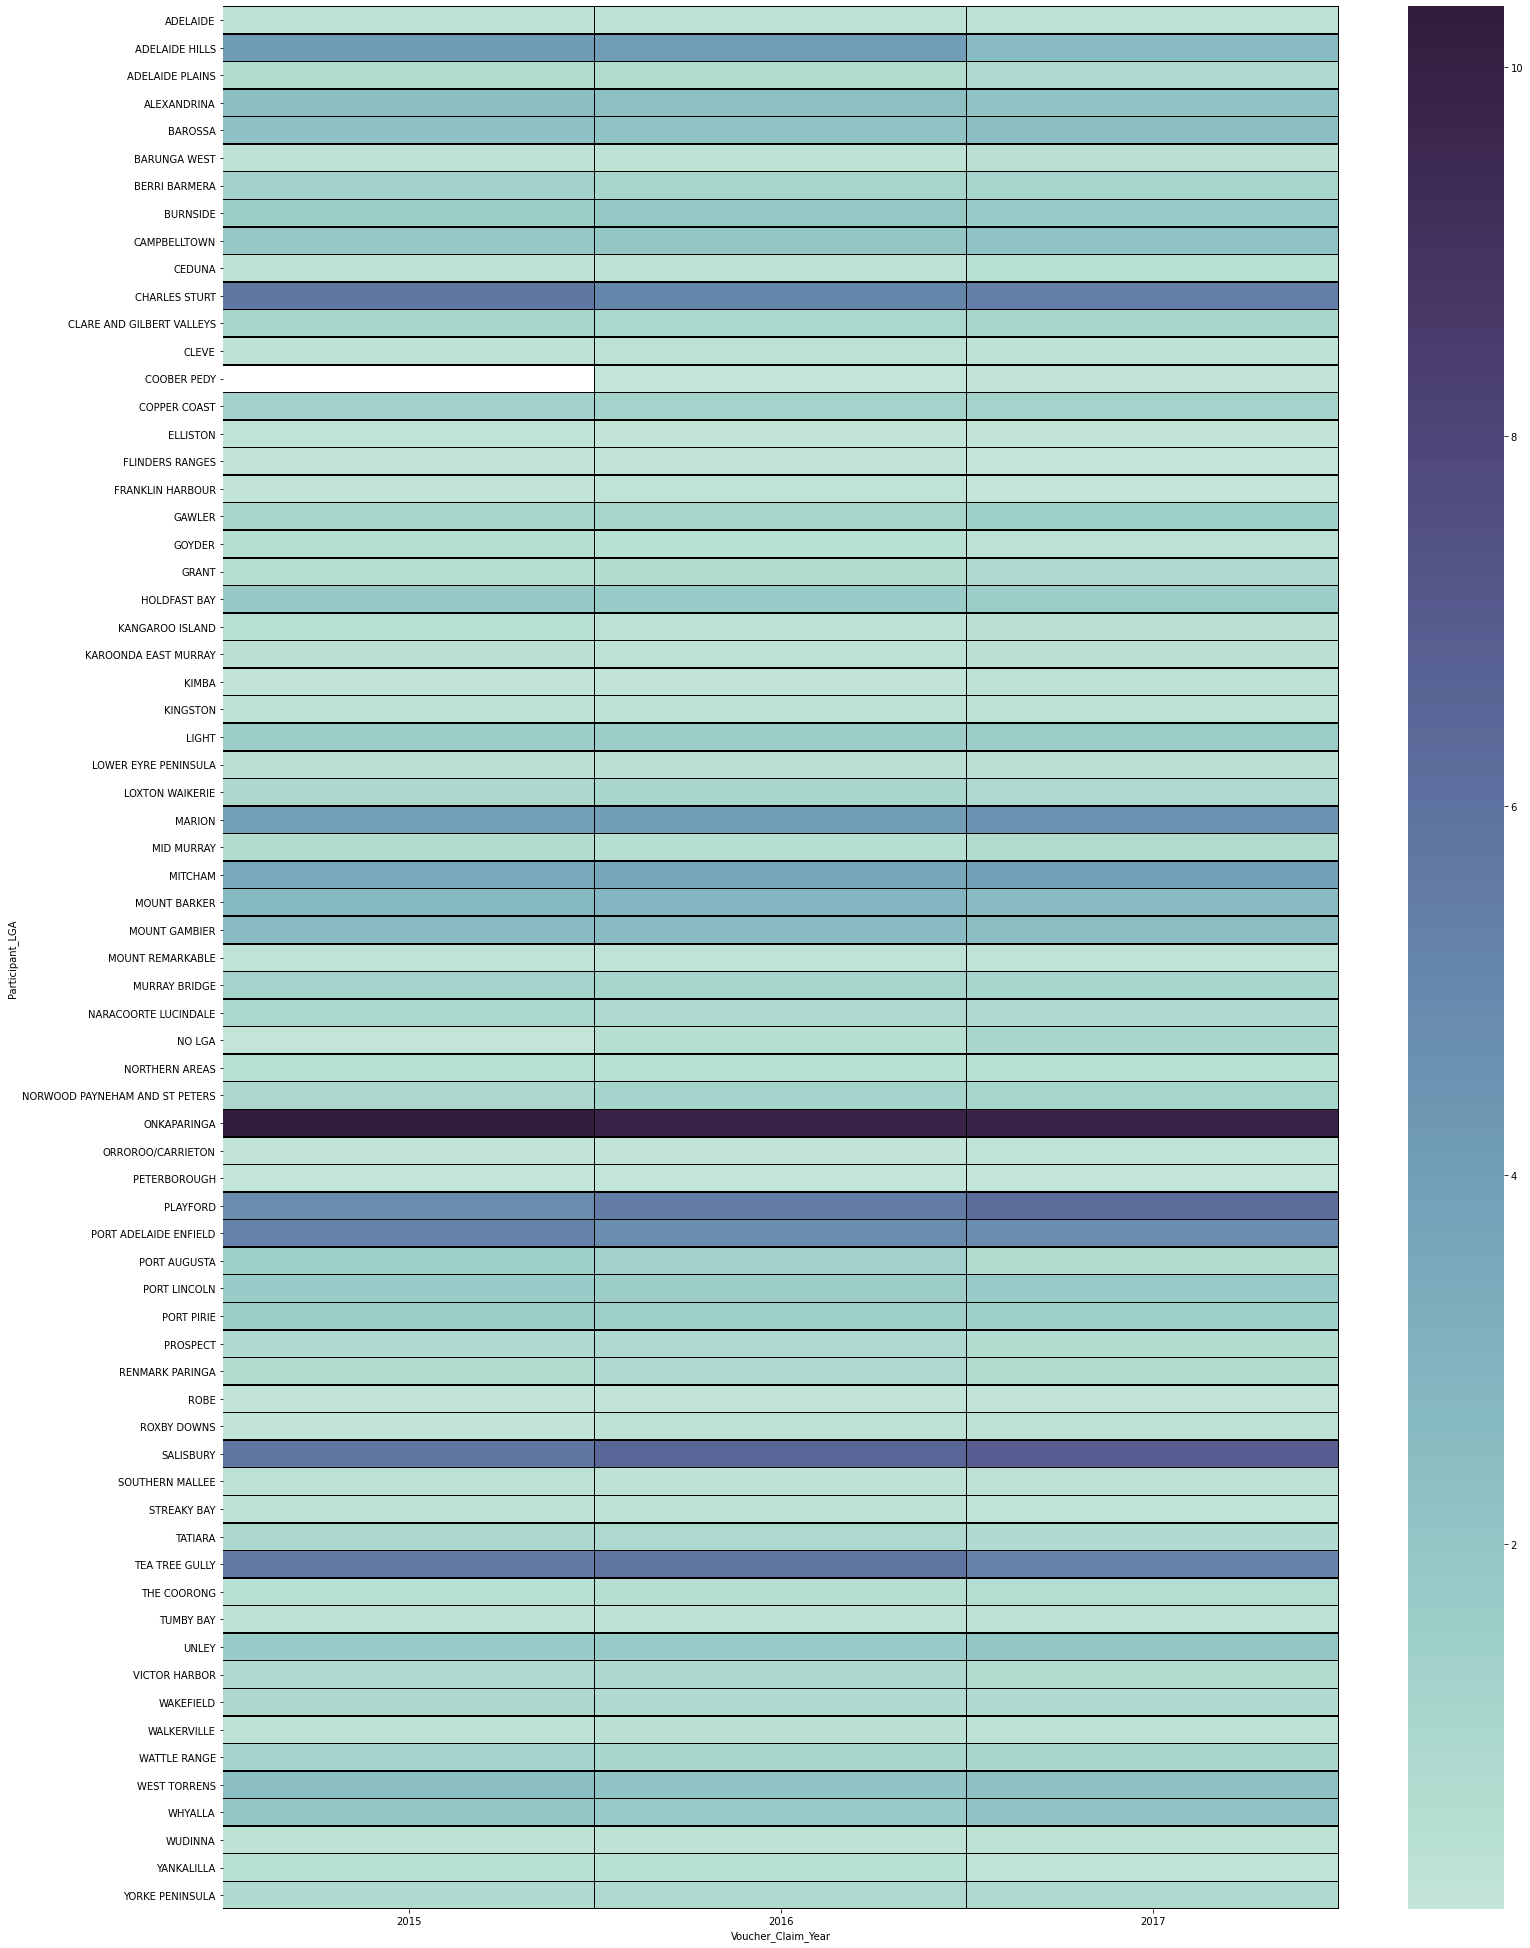

In [26]:
#Heatmap for distribution of vouchers use by LGAs that LGAs over/under represented
year_lga = sa_LGA_year.pivot("Participant_LGA", "Voucher_Claim_Year", "Percent_Value_By_Year")
plt.figure(figsize = (25,35))
ax = sns.heatmap(year_lga, linewidths=.5, linecolor='black', cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

### Summary
* LGAs that are **over represented** their use of voucher are ONKAPARINGA, PLAYFORD, PORT ADELAIDE ENFIELD, SALISBURY, TEA TREE GULLY, CHARLES STURT, ADELAIDE HILLS, MARION and MITCHAM.
* LGAs that are **under represented** their use of voucher are COOBER PEDY, KIMBA, KINGSTON, WUDINNA, YANKALILLA, etc.

### Question 4 (Cont.)

In [27]:
# Question 4: 
#Make a copy dataframe of LGA_scores
ms_LGA=LGA_scores.copy()

In [28]:
# Turn index to columns
ms_LGA.reset_index(inplace=True)
ms_LGA

INDEX_TYPE,LGA,IEO,IER,IRSAD,IRSD,Population,count
0,ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0,302.0
1,ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0,4756.0
2,ALBANY,999.0,999.0,977.0,987.0,33614.0,NaN
3,ALBURY,964.0,964.0,967.0,979.0,47851.0,NaN
4,ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0,2979.0
...,...,...,...,...,...,...,...
551,YASS VALLEY,1088.0,1088.0,1064.0,1061.0,15025.0,NaN
552,YILGARN,998.0,998.0,969.0,984.0,1642.0,NaN
553,YORK,1010.0,1010.0,975.0,983.0,3379.0,NaN
554,YORKE PENINSULA,969.0,969.0,933.0,952.0,11046.0,977.0


Text(0.5, 1.0, 'IRSD')

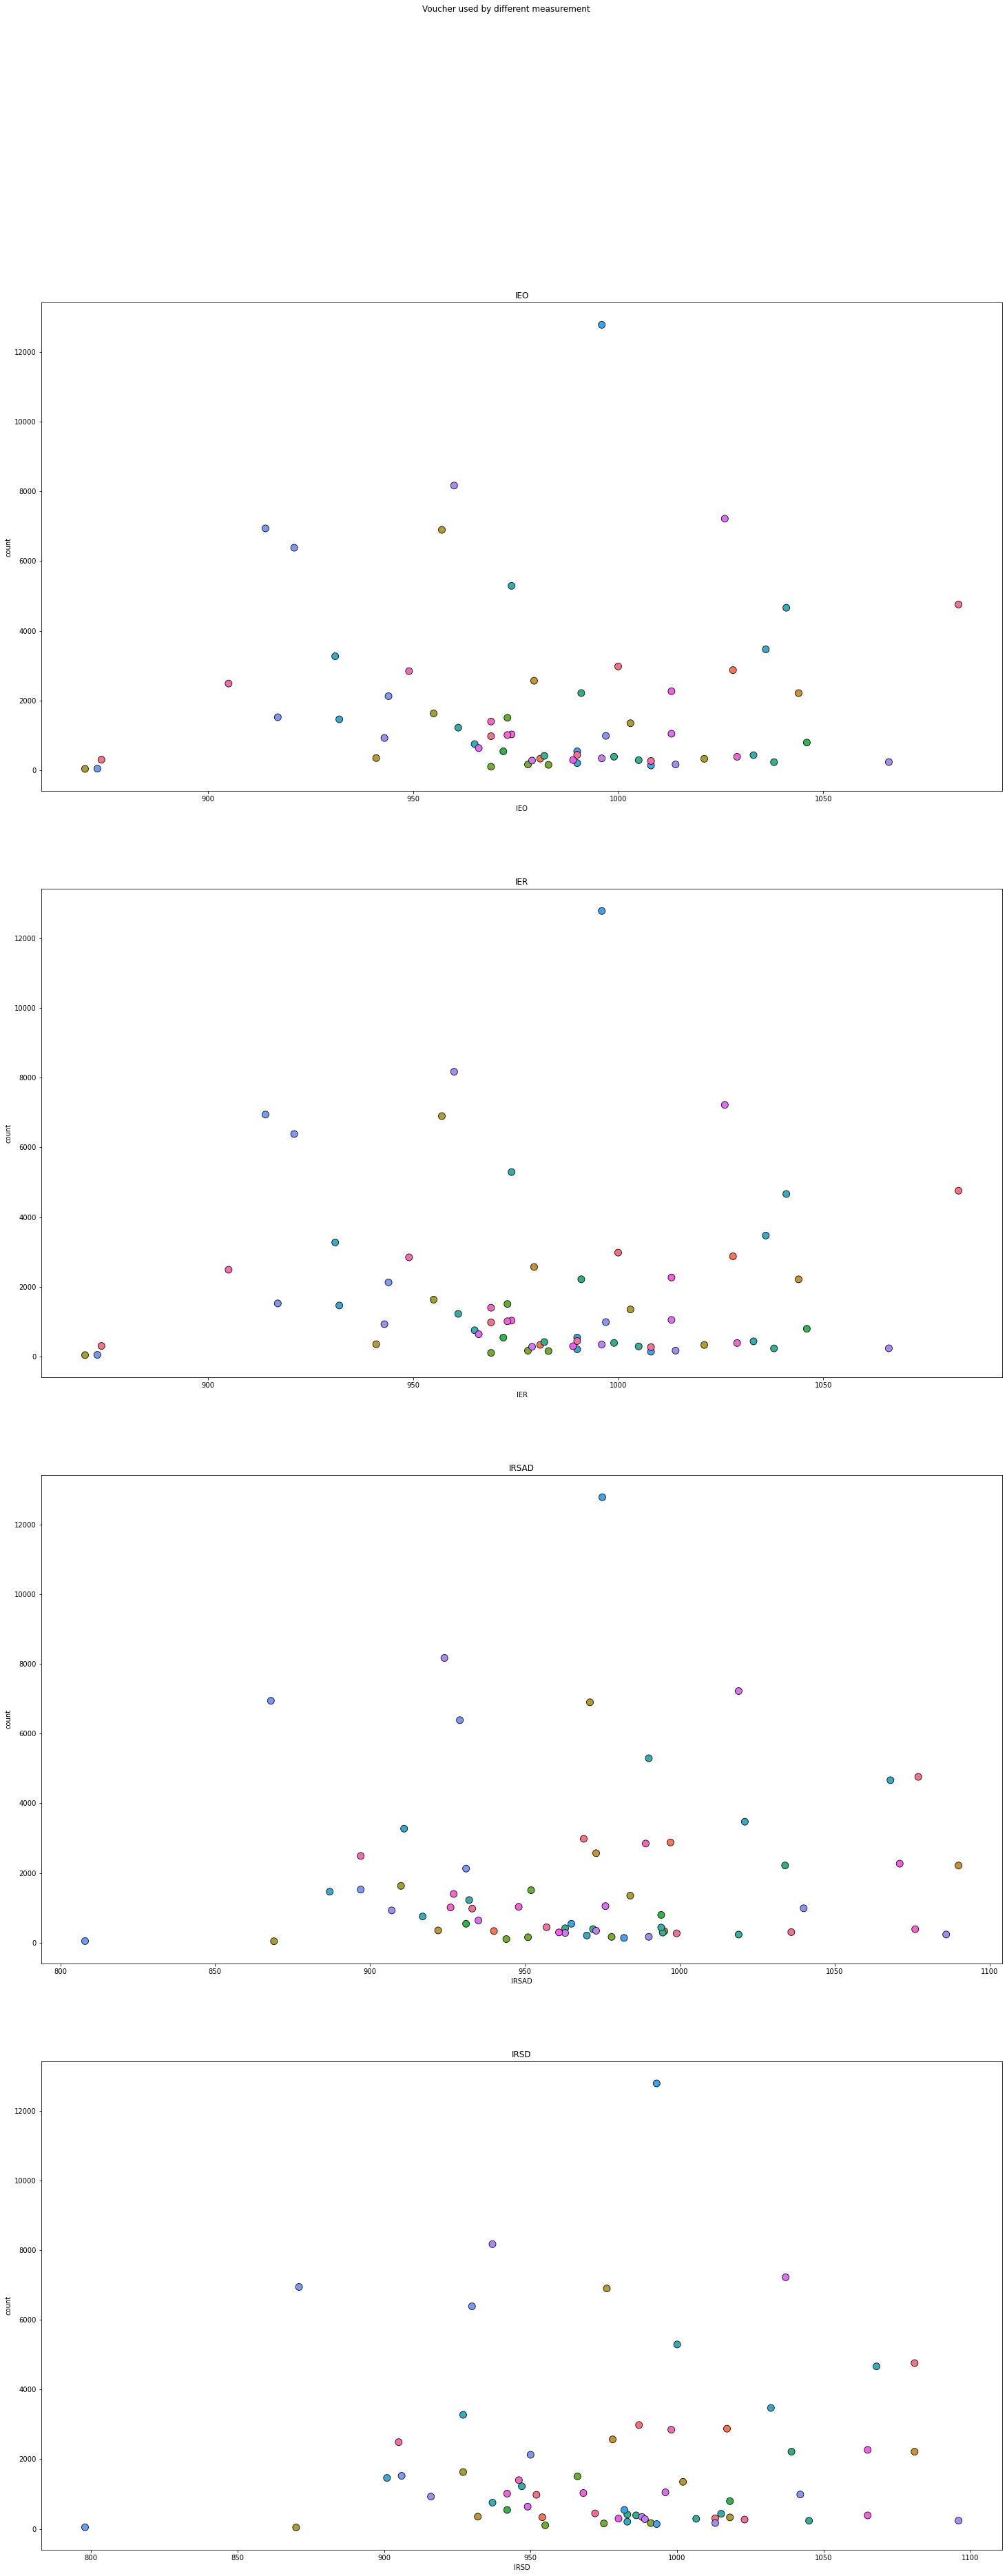

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(25, 60), sharey=True)
fig.suptitle('Voucher used by different measurement')
#Scatterplot shows the voucher distribution by IEO
sns.scatterplot(ax=axes[0],data=ms_LGA, x="IEO", y="count", hue="LGA", s=100, linewidths=.5, edgecolor="black", legend=False)
axes[0].set_title('IEO')
#Scatterplot shows the voucher distribution by IER
sns.scatterplot(ax=axes[1],data=ms_LGA, x="IER", y="count", hue="LGA", s=100, linewidths=.5, edgecolor="black", legend=False)
axes[1].set_title('IER')
#Scatterplot shows the voucher distribution by IRSAD
sns.scatterplot(ax=axes[2],data=ms_LGA, x="IRSAD", y="count", hue="LGA", s=100, linewidths=.5, edgecolor="black", legend=False)
axes[2].set_title('IRSAD')
#Scatterplot shows the voucher distribution by IRSD
sns.scatterplot(ax=axes[3],data=ms_LGA, x="IRSD", y="count", hue="LGA", s=100, linewidths=.5, edgecolor="black", legend=False)
axes[3].set_title('IRSD')

### Summary
As can be seen in the 4 scatterplot, there is a slight difference of the voucher use among the 4 measurements. The effects of IEO and IER to voucher use in LGA is significantly similar to each other. The effects of IRSAD and IRSD to voucher use in LGA is significantly similar to each other. However, it is quite different between (IEO, IER) and (IRSAD, IRSD).

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [30]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [31]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-31-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population,count
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0,NaN
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0,NaN
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0,NaN
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0,NaN
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0,NaN


In [32]:
sa_count['Voucher_Sport'].unique()

array(['Australian Rules', 'Gymnastics', 'Basketball', 'Netball', 'Golf',
       'Calisthenics', 'Cricket', 'Tennis', 'Surf Lifesaving', 'Fencing',
       'Football (Soccer)', 'Taekwondo', 'Table Tennis', 'Athletics',
       'Lacrosse', 'Rugby League', 'BMX', 'Hockey', 'Ju Jitsu',
       'Baseball', 'Diving', 'Softball', 'Swimming', 'Judo', 'Volleyball',
       'Rugby Union', 'Dancesport', 'Equestrian', 'Ice Skating', 'Squash',
       'Wrestling', 'Sailing', 'Motorcycling', 'Roller Sports',
       'Motor Sport', 'Cycling', 'Archery', 'Water Polo', 'Surf Riding',
       'Touch', 'Orienteering', 'Karate', 'Rowing', 'Paralympics',
       'Kung Fu (Wu Shu)', 'Pony Clubs', 'Bowls', 'Badminton',
       'Weightlifting', 'Shooting'], dtype=object)

In [33]:
#unify the second table to the first one to have same Participation Activity (sport)
qld_vouchers_scores['Participation Activity'].unique()

array(['*Other', 'Archery', 'Athletics', 'Australian Football',
       'Baseball', 'Basketball', 'BMX Bicycle Motocross', 'Body Boarding',
       'Bowls Lawn', 'Boxing', 'Broomball', 'Bushwalking', 'Calisthenics',
       'Canoeing Outrigger', 'Cheerleading', 'Cricket', 'Cycling',
       'Dancesport', 'Disability Sports', 'Dragon Boating', 'Equestrian',
       'Football (Soccer)', 'Futsal', 'Golf', 'Gymnastics', 'Hockey',
       'Ice Hockey', 'Ice Skating', 'Inline Hockey', 'Ju Jitsu', 'Judo',
       'Karate', 'Karting', 'Kayaking', 'Life Saving Surf',
       'Mixed Martial Arts', 'Motor Cycling', 'Netball', 'Oztag',
       'Parkour', 'Polocrosse', 'Pony Club', 'Riding for the Disabled',
       'Rock Climbing', 'Roller Sports', 'Rowing', 'Rugby League',
       'Rugby Union', 'Sailing', 'Shooting', 'Skipping', 'Softball',
       'Squash', 'Surfing', 'Swimming', 'Swimming Synchronised',
       'Table Tennis', 'Taekwondo', 'T-Ball', 'Tennis', 'Tenpin Bowling',
       'Touch', 'Trail Bike R

In [34]:
new_qld=qld_vouchers_scores[qld_vouchers_scores['Participation Activity'].isin(['Gymnastics', 'Basketball', 'Netball', 'Golf', 'Calisthenics', 'Cricket', 'Tennis', 'Football (Soccer)', 'Taekwondo', 'Table Tennis', 'Athletics', 'Rugby League', 'Hockey', 'Ju Jitsu', 'Baseball', 'Softball', 'Swimming', 'Judo', 'Rugby Union', 'Dancesport', 'Equestrian', 'Ice Skating', 'Squash', 'Sailing', 'Roller Sports', 'Cycling', 'Archery', 'Touch', 'Karate', 'Rowing', 'Weightlifting', 'Shooting'])]
new_qld.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population,count
13,2000010829,X784DOAP,12,NaN,Yes,Archery,Hinchinbrook Bowmen Inc,Ingham,Hinchinbrook (S),Hinchinbrook,Ingham,40.0,HINCHINBROOK (S),NaN,NaN,NaN,NaN,NaN,NaN
14,2000011952,LZIRY6XS,7,NaN,No,Archery,Gympie Field Archers Association Inc,Imbil,Gympie (R),Gympie,The Palms,130.0,GYMPIE,962.0,962.0,916.0,929.0,45749.0,NaN
15,2000006332,DH5FNQKS,9,NaN,No,Archery,Gympie Field Archers Association Inc,Imbil,Gympie (R),Gympie,Curra,130.0,GYMPIE,962.0,962.0,916.0,929.0,45749.0,NaN
16,2000006325,NPKP5E1X,10,NaN,No,Archery,Gympie Field Archers Association Inc,Imbil,Gympie (R),Gympie,Curra,130.0,GYMPIE,962.0,962.0,916.0,929.0,45749.0,NaN
17,2000001140,X332JQI2,14,NaN,Yes,Archery,Gympie Field Archers Association Inc,Imbil,Gympie (R),Gympie,Cooran,130.0,GYMPIE,962.0,962.0,916.0,929.0,45749.0,NaN


In [35]:
sa_count = sa_count.rename(columns={'Voucher_Sport': 'Participation Activity'})

In [36]:
#Merge dataframe South Australia and Queensland
sa_qld = sa_count.merge(new_qld, on='Participation Activity')
sa_qld.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Participation Activity,Participant_LGA,...,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO_y,IER_y,IRSAD_y,IRSD_y,Population_y,count
0,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,...,Mulgrave,Innisfail,7.0,CASSOWARY COAST,957.0,957.0,926.0,944.0,27676.0,NaN
1,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,...,Redlands,Victoria Point,85.6,REDLAND,1049.0,1049.0,1030.0,1029.0,138641.0,NaN
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,...,Ashgrove,The Gap,98.0,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0,NaN
3,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,...,Southport,Broadbeach Waters,100.0,GOLD COAST,1008.0,1008.0,1016.0,1014.0,494591.0,NaN
4,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,...,Redcliffe,Redcliffe,110.0,MORETON BAY,1024.0,1024.0,999.0,1004.0,377992.0,NaN


In [37]:
sa_group = sa_qld.groupby(['Participation Activity', 'Participant_LGA'])

In [47]:
#Voucher distribution by regions/ LGA
sa_s=pd.DataFrame({'count':sa_group.size()})
sa_s.head()

count
Participation Activity Participant_LGA       
Archery                ADELAIDE HILLS      21
                       ALEXANDRINA         63
                       BURNSIDE            14
                       CHARLES STURT        7
                       HOLDFAST BAY         7

In [39]:
qld_group = sa_qld.groupby(['Participation Activity', 'LGA'])

In [48]:
qld_s=pd.DataFrame({'count':qld_group.size()})
qld_s.head()

count
Participation Activity LGA                    
Archery                GYMPIE              136
                       HINCHINBROOK (S)     34
                       MORETON BAY          34
                       TOWNSVILLE           34
Athletics              BLACKALL TAMBO     9036

In [49]:
# Turn index to columns
sa_s.reset_index(inplace=True)
qld_s.reset_index(inplace=True)
qld_s=qld_s.rename(columns={'LGA': 'Participant_LGA'})

In [50]:
#Merge dataframe South Australia and Queensland by Participant Activity (Sport)
sa_qld_sport=sa_s.append(qld_s)
sa_qld_sport.head()

,Participation Activity,Participant_LGA,count
0,Archery,ADELAIDE HILLS,21
1,Archery,ALEXANDRINA,63
2,Archery,BURNSIDE,14
3,Archery,CHARLES STURT,7
4,Archery,HOLDFAST BAY,7


In [51]:
sa_qld_sport['Participant_LGA'].unique()

array(['ADELAIDE HILLS', 'ALEXANDRINA', 'BURNSIDE', 'CHARLES STURT',
       'HOLDFAST BAY', 'MOUNT BARKER', 'ONKAPARINGA', 'SALISBURY',
       'VICTOR HARBOR', 'WEST TORRENS', 'YANKALILLA', 'ADELAIDE',
       'ADELAIDE PLAINS', 'BAROSSA', 'BARUNGA WEST', 'BERRI BARMERA',
       'CAMPBELLTOWN', 'CEDUNA', 'CLARE AND GILBERT VALLEYS', 'CLEVE',
       'COPPER COAST', 'FLINDERS RANGES', 'GAWLER', 'GRANT',
       'KAROONDA EAST MURRAY', 'LIGHT', 'LOWER EYRE PENINSULA',
       'LOXTON WAIKERIE', 'MARION', 'MID MURRAY', 'MITCHAM',
       'MOUNT GAMBIER', 'MOUNT REMARKABLE', 'MURRAY BRIDGE',
       'NARACOORTE LUCINDALE', 'NO LGA', 'NORWOOD PAYNEHAM AND ST PETERS',
       'PLAYFORD', 'PORT ADELAIDE ENFIELD', 'PORT AUGUSTA',
       'PORT LINCOLN', 'PORT PIRIE', 'PROSPECT', 'RENMARK PARINGA',
       'ROBE', 'ROXBY DOWNS', 'SOUTHERN MALLEE', 'TATIARA',
       'TEA TREE GULLY', 'THE COORONG', 'UNLEY', 'WAKEFIELD',
       'WALKERVILLE', 'WATTLE RANGE', 'WHYALLA', 'WUDINNA',
       'YORKE PENINSULA',

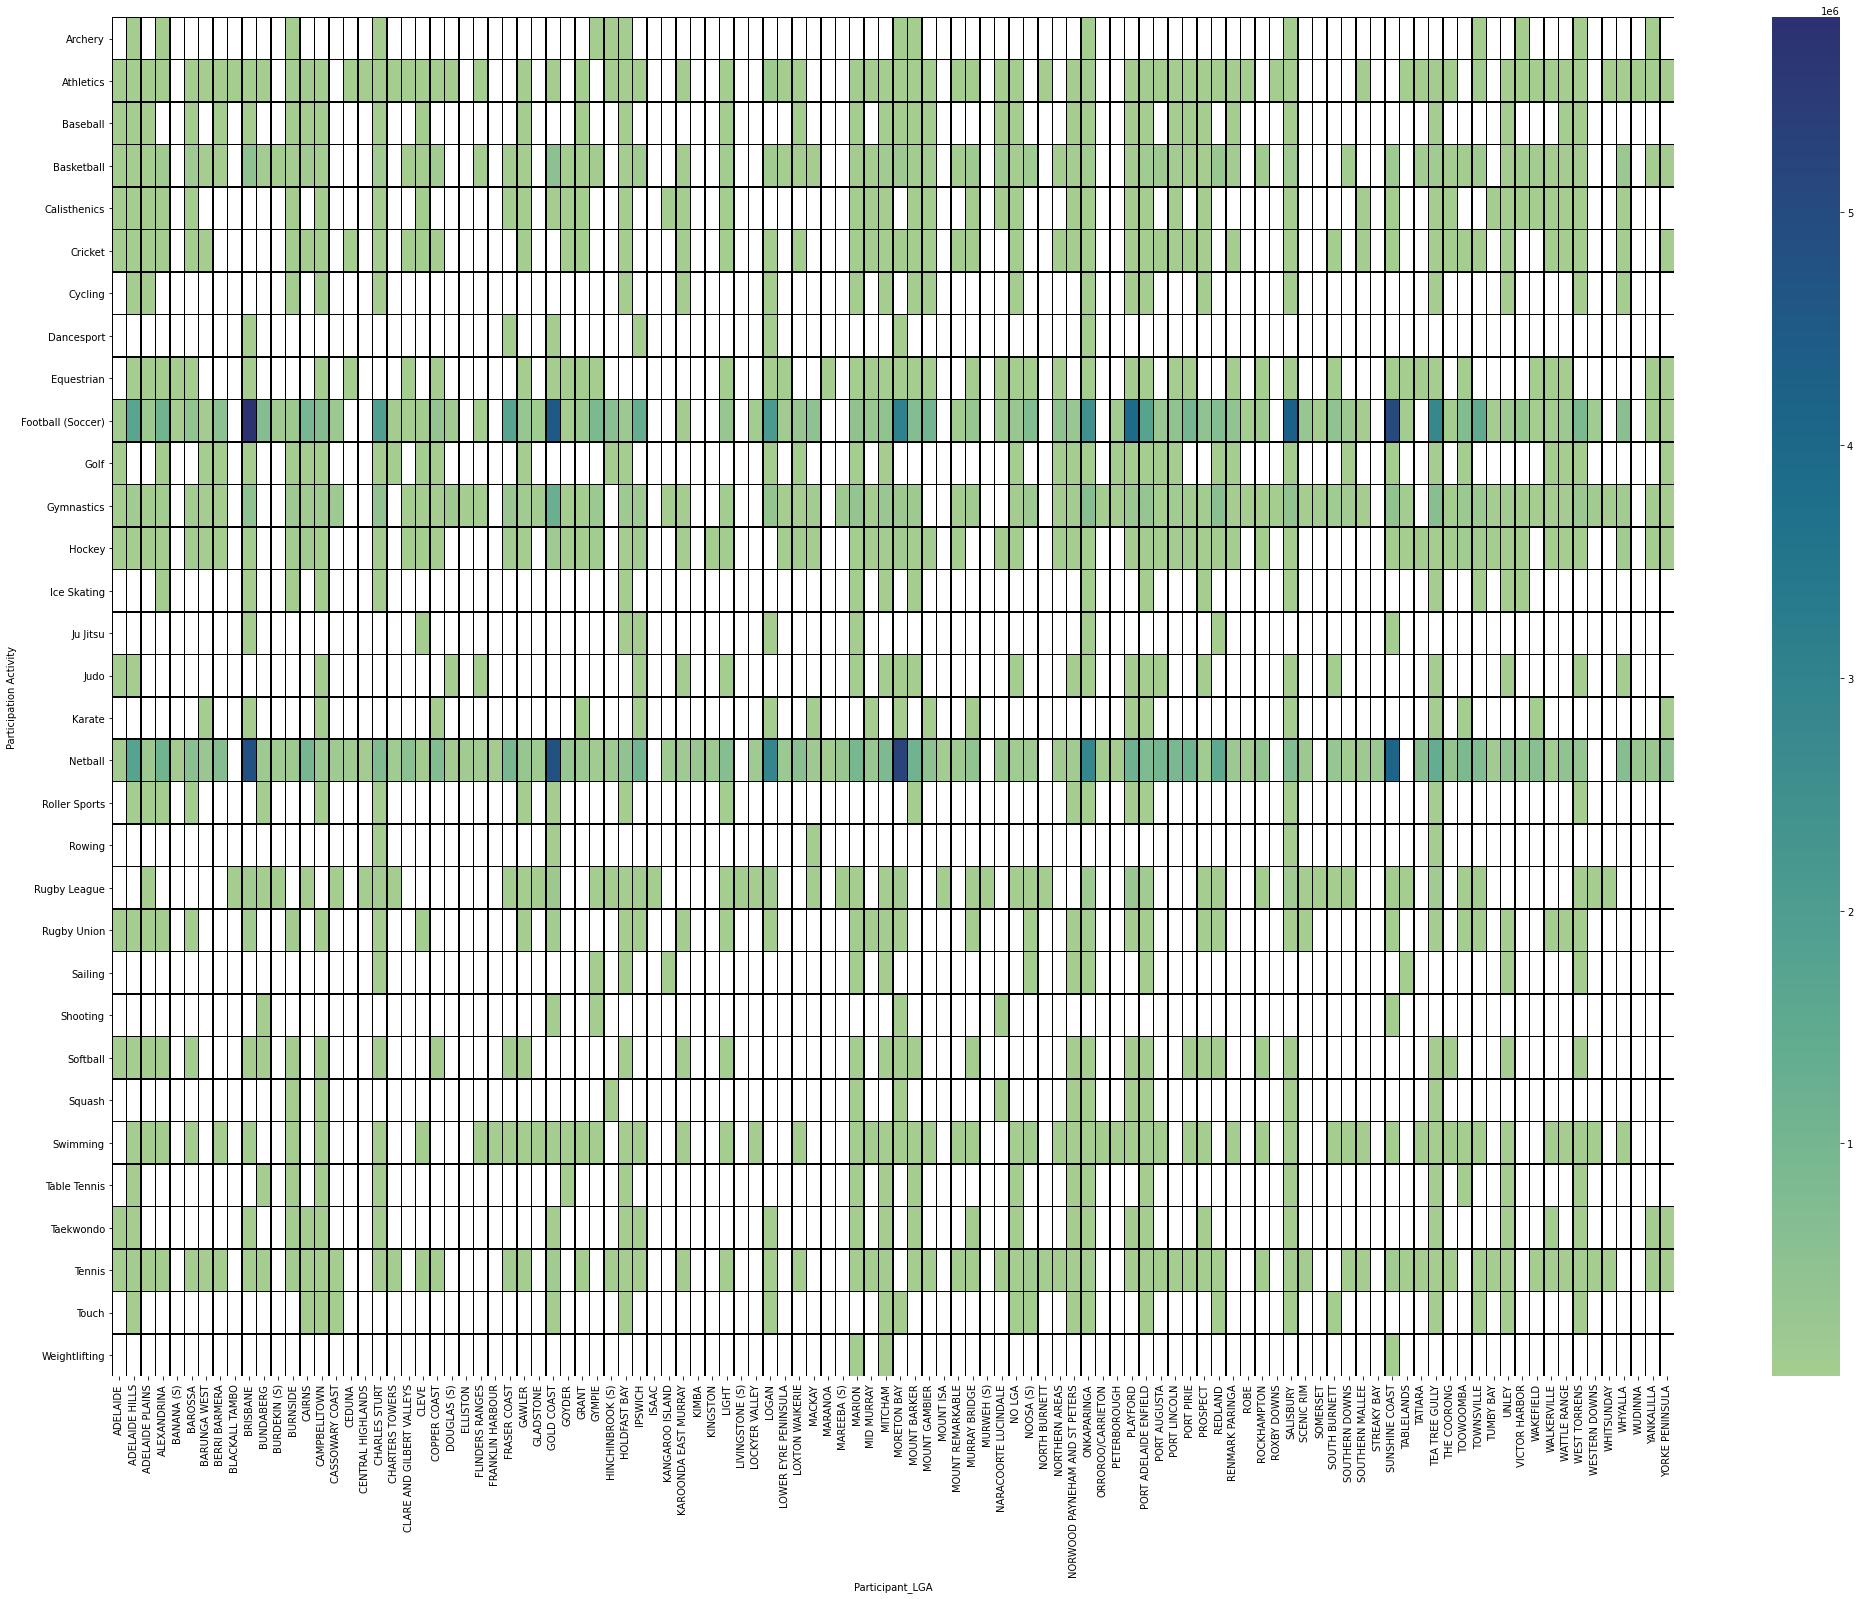

In [58]:
#Heatmap for voucher distribution of sports in different parts of the state
sa_qld_hm = sa_qld_sport.pivot("Participation Activity", "Participant_LGA", "count")
plt.figure(figsize = (35,25))
ax = sns.heatmap(sa_qld_hm, linewidths=.5, linecolor='black', cmap=sns.color_palette("crest", as_cmap=True))

### Summary
* In general, the voucher distribution of South Australia and Queensland is quite similar by Participation Activity. 
* For Swimming, the voucher distribution of Queensland LGA is greater than South Australia LGA. For Netball, the voucher distribution of Queensland LGA is slightly smaller than South Australia LGA.